In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import torch



In [51]:
torch.manual_seed(42)

In [52]:
df  = pd.read_csv("./fmnist_small.csv")

In [53]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.iloc[i,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,  35,  38,
         48,  54,  51,  65,  96,  30,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   1,   3,   0,  48,  88,  71, 152, 150,
        124, 121, 147, 128,  80,  78,  68,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  68, 102,  33,  66, 137,
        140, 137, 118,  45,  38,  70,  96,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 174,  74,  46,  92,  66,  21,
         41,  92,  39,  61,  60,  57,  74,  50,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0, 118, 230, 185,  55,  14,  66,  73,
         44, 107,  67,  69,  63,  53,  47,  71,  22,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 175, 198, 202, 233,  85,   7,  42,
         36,  43,  32,  43,  34,  47,  56,  43,  35,   0,   0,   0,   0,
          0,   0],
       [  

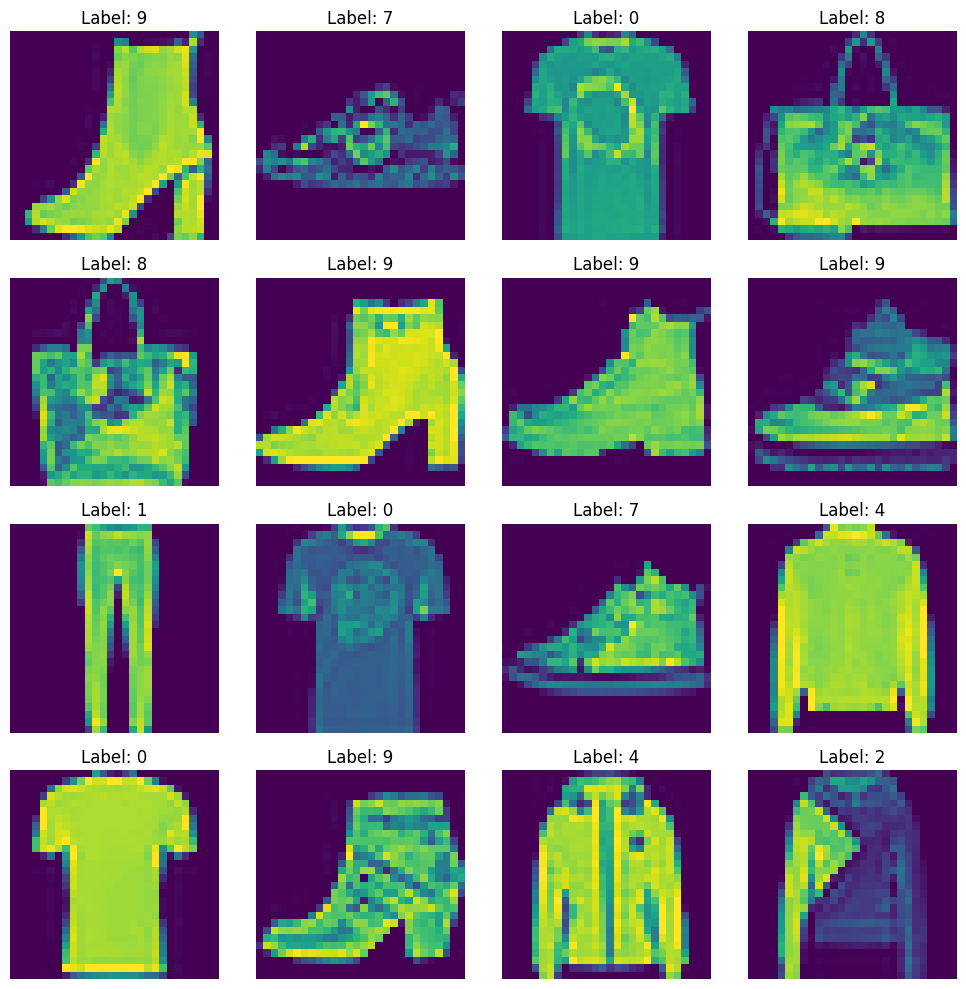

In [55]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,4,figsize=(10,10))

for i ,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,1]
                 )
plt.show()


In [56]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [68]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [69]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [60]:
train_dataset.__getitem__(1)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.0000, 0.3843, 0.3765, 0.3922, 0.3804, 0.3176, 0.0000,
         0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0275, 0.8627, 0.7059, 0.6196, 0.6471, 0.8157,
         0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0275, 0.3529, 0.7098, 0.5529, 0.7137, 0.8980, 0.7137,
         0.6471, 0.7765, 0.4353, 0.1608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3137, 0.5804, 0.7098, 0.7059, 0.5922, 0.5882, 0.5490, 0.7647,
         0.5765, 0.6588, 0.6157, 0.6863, 0.7686, 0.6588, 0.4196, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [70]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [71]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [63]:
train_loader

In [72]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [73]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [74]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [75]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.3334751391410828
Epoch: 2 , Loss: 0.7774422498544057
Epoch: 3 , Loss: 0.6725577651460966
Epoch: 4 , Loss: 0.5862965530157089
Epoch: 5 , Loss: 0.5413241712252299
Epoch: 6 , Loss: 0.5073623482386271
Epoch: 7 , Loss: 0.4797788003087044
Epoch: 8 , Loss: 0.44758854240179063
Epoch: 9 , Loss: 0.43169351319471994
Epoch: 10 , Loss: 0.40293260047833124
Epoch: 11 , Loss: 0.3943439939618111
Epoch: 12 , Loss: 0.38043668727080027
Epoch: 13 , Loss: 0.3490863266090552
Epoch: 14 , Loss: 0.34088532080252965
Epoch: 15 , Loss: 0.3221150948603948
Epoch: 16 , Loss: 0.32698877796530723
Epoch: 17 , Loss: 0.2966078242659569
Epoch: 18 , Loss: 0.29222677131493885
Epoch: 19 , Loss: 0.27343246070047217
Epoch: 20 , Loss: 0.2615767952799797
Epoch: 21 , Loss: 0.2669719301909208
Epoch: 22 , Loss: 0.25935251712799073
Epoch: 23 , Loss: 0.2515568195283413
Epoch: 24 , Loss: 0.22834971318642297
Epoch: 25 , Loss: 0.23450456658999125
Epoch: 26 , Loss: 0.22402724986275038
Epoch: 27 , Loss: 0.204939973652362

In [76]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [77]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8325


In [78]:
len(test_loader)

38